## Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

## Setting up DataFrame and Final Touchups

In [3]:
gdp=pd.read_csv("GDP_cleaned_1920.csv")

gender=pd.read_csv("gender_19_20_cleaned.csv")
popg=pd.read_csv("PopGrowth20192020.csv")
lb=pd.read_csv("LaborForce20192020.csv")
adole = pd.read_csv("AdolescentFertility20192020.csv")
enroll = pd.read_csv("FemaleEnrollment20192020.csv")
gpi = pd.read_csv("GPI20192020.csv")
gdp_pp = pd.read_csv("gdpcapita_1920.csv")

In [4]:
gdp = gdp.drop(columns = "Unnamed: 0" )
gender = gender.drop(columns = "Unnamed: 0" )
gdp_pp = gdp_pp.drop(columns = "Unnamed: 0" )

In [5]:
df = gdp.merge(gender, how = "outer", on = "Country Name").merge(lb, how = "outer", on = "Country Name")\
        .merge(adole, how = "outer", on = "Country Name"). merge(enroll, how = "outer", on = "Country Name")\
        .merge(gpi, how = "outer", on = "Country Name").merge(gdp_pp, how = "outer", on = "Country Name")
df = df[df["Country Name"] != "Low income"]
df = df[df["Country Name"] != "Other small states"]

In [6]:
df_original = df.copy() #saving a copy

In [27]:
top10gdp = df[["Country Name","2020 in bill"]].sort_values(by = "2020 in bill", ascending = False).head(10)

[Text(0, 0, '21060.50'),
 Text(0, 0, '14687.70'),
 Text(0, 0, '5040.11'),
 Text(0, 0, '3889.67'),
 Text(0, 0, '2704.61'),
 Text(0, 0, '2667.69'),
 Text(0, 0, '2639.01'),
 Text(0, 0, '1896.76'),
 Text(0, 0, '1645.42'),
 Text(0, 0, '1644.31')]

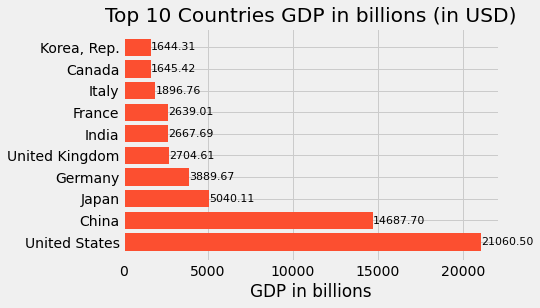

In [29]:
fig, ax = plt.subplots()

ax.barh(top10gdp["Country Name"], top10gdp["2020 in bill"], align = "center")
ax.set_title("Top 10 Countries GDP in billions (in USD)")
ax.set_xlabel("GDP in billions")

hbars1 = ax.barh(top10gdp["Country Name"], top10gdp["2020 in bill"]) #, align='center')
ax.bar_label(hbars1, fmt='%.2f', size = 11)

In [7]:
df2020 = df[["Country Name", "2020 in bill", "Parliament 2020", "LF2020", "AdolescentFertility2020", 
             "FemaleEnrollment2020", "GPI2020", "GDP 2020"]]
df2020 = df2020.dropna().reset_index(drop=True)

In [8]:
df2020 = df2020.rename(columns = {"Country Name": "Country",
                                 "2020 in bill": "GDP_B",
                                 "Parliament 2020": "PARLI",
                                 "LF2020": "LABOR",
                                 "AdolescentFertility2020":"FERT",
                                 "FemaleEnrollment2020": "ENROLL",
                                 "GPI2020": "GPI",
                                 "GDP 2020": "GDP_PC"})

In [9]:
df2020["GDP_PCL"] = np.log(df2020["GDP_PC"])

In [10]:
df2020.head(5)

,Country,GDP_B,PARLI,LABOR,FERT,ENROLL,GPI,GDP_PC,GDP_PCL
0,Albania,15.131866,29.508197,75.857448,19.4332,95.332367,1.02399,5332.160475,8.581512
1,United Arab Emirates,349.473000,50.000000,52.417105,4.5684,104.001007,1.01047,37629.174170,10.535535
2,Argentina,385.540000,40.856031,70.519041,62.1322,112.555481,1.02426,8496.424142,9.047401
3,Armenia,12.641698,23.484848,67.218260,19.6780,89.281441,1.03191,4505.867364,8.413136
4,Australia,1326.900000,30.463576,85.965111,10.5474,131.806595,0.97929,51720.370760,10.853607


In [14]:
df_corr = df2020.corr()
df_corr

,GDP_B,PARLI,LABOR,FERT,ENROLL,GPI,GDP_PC,GDP_PCL
GDP_B,1.000000,0.049594,0.055141,-0.144603,0.085534,-0.062173,0.282815,0.243898
PARLI,0.049594,1.000000,0.307818,-0.145409,0.365643,0.176286,0.324218,0.280841
LABOR,0.055141,0.307818,1.000000,-0.015853,0.163058,-0.124836,0.342316,0.203659
FERT,-0.144603,-0.145409,-0.015853,1.000000,-0.662683,-0.123469,-0.560178,-0.739494
ENROLL,0.085534,0.365643,0.163058,-0.662683,1.000000,0.204577,0.545749,0.757828
GPI,-0.062173,0.176286,-0.124836,-0.123469,0.204577,1.000000,-0.026086,-0.006205
GDP_PC,0.282815,0.324218,0.342316,-0.560178,0.545749,-0.026086,1.000000,0.834620
GDP_PCL,0.243898,0.280841,0.203659,-0.739494,0.757828,-0.006205,0.834620,1.000000


In [15]:
df_corr = df_corr.drop("GDP_B")
df_corr = df_corr.drop("GDP_PC")
#df_corr = df_corr.drop("GDP_PC_log")
df_corr = df_corr.drop("GDP_PCL")
df_corr = df_corr[["GDP_PCL", "GDP_PC"]]
df_corr

,GDP_PCL,GDP_PC
PARLI,0.280841,0.324218
LABOR,0.203659,0.342316
FERT,-0.739494,-0.560178
ENROLL,0.757828,0.545749
GPI,-0.006205,-0.026086


In [16]:
df_corr.reindex(["PARLI", "LABOR", "ENROLL", "GPI", "FERT"])

,GDP_PCL,GDP_PC
PARLI,0.280841,0.324218
LABOR,0.203659,0.342316
ENROLL,0.757828,0.545749
GPI,-0.006205,-0.026086
FERT,-0.739494,-0.560178


In [17]:
df_corr[["GDP_PCL"]]

,GDP_PCL
PARLI,0.280841
LABOR,0.203659
FERT,-0.739494
ENROLL,0.757828
GPI,-0.006205


In [18]:
df_corr[["GDP_PC"]]

,GDP_PC
PARLI,0.324218
LABOR,0.342316
FERT,-0.560178
ENROLL,0.545749
GPI,-0.026086


## Data Exploration

In [19]:
top10 = df2020[["Country","GDP_PC"]].sort_values(by = "GDP_PC", ascending = False).head(10)

In [20]:
tail10 = df2020[["Country","GDP_PC"]].sort_values(by = "GDP_PC", ascending = False).tail(10)

[Text(0, 0, '117370.50'),
 Text(0, 0, '85656.32'),
 Text(0, 0, '85420.19'),
 Text(0, 0, '67329.68'),
 Text(0, 0, '63530.63'),
 Text(0, 0, '60915.42'),
 Text(0, 0, '60729.45'),
 Text(0, 0, '59200.18'),
 Text(0, 0, '52837.90'),
 Text(0, 0, '52162.57')]

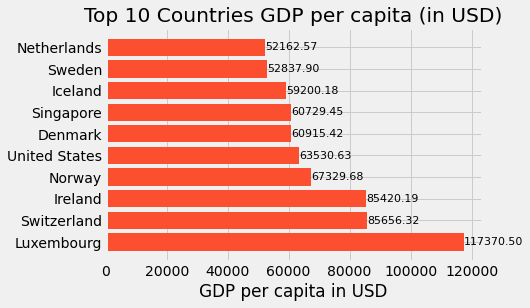

In [23]:
fig, ax = plt.subplots()

ax.barh(top10["Country"], top10["GDP_PC"], align = "center")
ax.set_title("Top 10 Countries GDP per capita (in USD)")
ax.set_xlabel("GDP per capita in USD")

hbars1 = ax.barh(top10["Country"], top10["GDP_PC"]) #, align='center')
ax.bar_label(hbars1, fmt='%.2f', size = 11)


[Text(0, 0, '1490.20'),
 Text(0, 0, '1237.95'),
 Text(0, 0, '1182.52'),
 Text(0, 0, '1139.19'),
 Text(0, 0, '1042.10'),
 Text(0, 0, '833.24'),
 Text(0, 0, '822.91'),
 Text(0, 0, '597.53'),
 Text(0, 0, '449.96'),
 Text(0, 0, '216.83')]

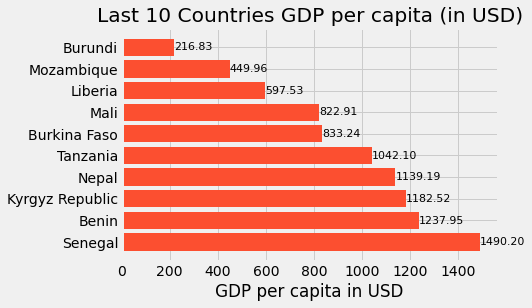

In [22]:
fig, ax = plt.subplots()


ax.set_xlabel("GDP per capita in USD")
ax.barh(tail10["Country"], tail10["GDP_PC"],align='center')
ax.set_title("Last 10 Countries GDP per capita (in USD)")


hbars2 = ax.barh(tail10["Country"], tail10["GDP_PC"])
ax.bar_label(hbars2, fmt='%.2f', size = 11)


In [24]:
top10gdp = df2020[["Country","GDP_B"]].sort_values(by = "GDP_B", ascending = False).head(10)

[Text(0, 0, '21060.50'),
 Text(0, 0, '3889.67'),
 Text(0, 0, '2704.61'),
 Text(0, 0, '2667.69'),
 Text(0, 0, '2639.01'),
 Text(0, 0, '1896.76'),
 Text(0, 0, '1645.42'),
 Text(0, 0, '1644.31'),
 Text(0, 0, '1448.56'),
 Text(0, 0, '1326.90')]

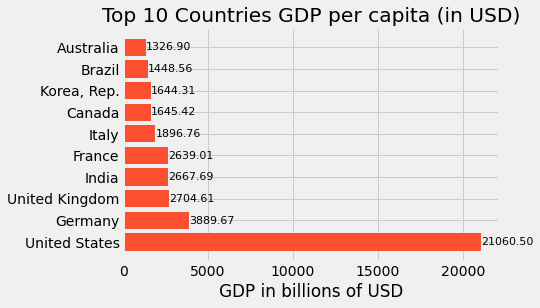

## Scatterplots

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [31]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

def correlation(x, y):
    "Calculate the correlation between two arrays of real numbers."
    x_in_standard_units = standard_units(x).to_numpy()
    y_in_standard_units = standard_units(y).to_numpy()
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)


### Parliament

In [32]:
y = df2020[["GDP_PC"]]
x_parli = df2020[["PARLI"]]


regress_linear = LinearRegression()
regress_linear.fit(x_parli, y)
regress_linear.intercept_, regress_linear.coef_

(array([2821.72413686]), array([[601.00121168]]))

In [33]:
correlation(x_parli, y)

array([0.32421811])

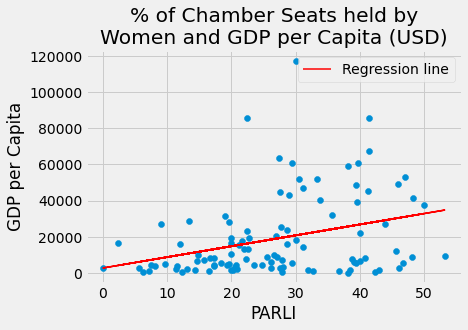

In [35]:
fig, ax = plt.subplots()

ax.scatter(x_parli, y)
ax.plot(x_parli, (601.0012116*x_parli + 2821.72413686),
        c = "r", lw = 1.5, label="Regression line")
ax.set_xlabel("PARLI")
ax.set_ylabel("GDP per Capita")
ax.set_title("% of Chamber Seats held by\nWomen and GDP per Capita (USD)")
ax.legend()

### Labor Force

In [37]:
x_lab = df2020[["LABOR"]]

regress_linear = LinearRegression()
regress_linear.fit(x_lab, y)
regress_linear.intercept_, regress_linear.coef_

(array([-14670.06645394]), array([[457.88941934]]))

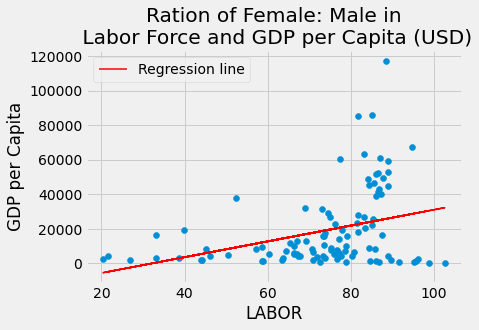

In [38]:
fig, ax = plt.subplots()

ax.scatter(x_lab, y)
ax.plot(x_lab, (457.88941934*x_lab -14670.06645394),
        c = "r", lw = 1.5, label="Regression line")
ax.set_xlabel("LABOR")
ax.set_ylabel("GDP per Capita")
ax.set_title("Ration of Female: Male in\n Labor Force and GDP per Capita (USD)")
ax.legend()

### Fertility

In [39]:
x_fert = df2020[["FERT"]]

regress_linear = LinearRegression()
regress_linear.fit(x_fert, y)
regress_linear.intercept_, regress_linear.coef_

(array([32207.87089653]), array([[-376.23227245]]))

In [40]:
correlation(x_fert, y)

array([-0.56017819])

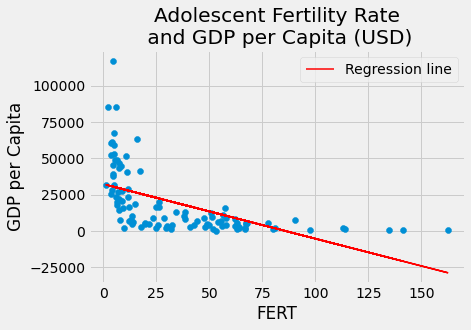

In [42]:
fig, ax = plt.subplots()

ax.scatter(x_fert, y)
ax.plot(x_fert, (-376.23227245*x_fert + 32207.87089653),
        c = "r", lw = 1.5, label="Regression line")
ax.set_xlabel("FERT")
ax.set_ylabel("GDP per Capita")
ax.set_title("Adolescent Fertility Rate\n and GDP per Capita (USD)")
ax.legend()

### Enroll

In [43]:
x_enroll = df2020[["ENROLL"]]


regress_linear = LinearRegression()
regress_linear.fit(x_enroll, y)
regress_linear.intercept_, regress_linear.coef_

(array([-25971.47135697]), array([[473.21827401]]))

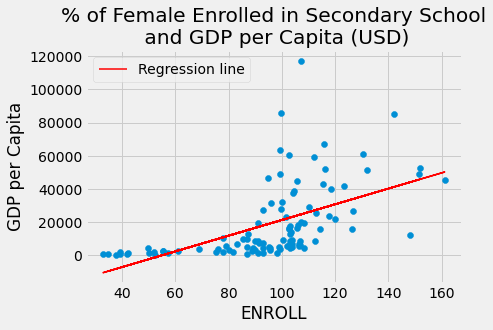

In [44]:
fig, ax = plt.subplots()

ax.scatter(x_enroll, y)
ax.plot(x_enroll, (473.21827401*x_enroll - 25971.47135697),
        c = "r", lw = 1.5, label="Regression line")
ax.set_xlabel("ENROLL")
ax.set_ylabel("GDP per Capita")
ax.set_title("% of Female Enrolled in Secondary School\n and GDP per Capita (USD)")
ax.legend()

### GPI

In [45]:
x_gpi = df2020[["GPI"]]


regress_linear = LinearRegression()
regress_linear.fit(x_gpi, y)
regress_linear.intercept_, regress_linear.coef_

(array([34593.27278319]), array([[-15521.07375328]]))

In [46]:
correlation(x_gpi, y)

array([-0.02608649])

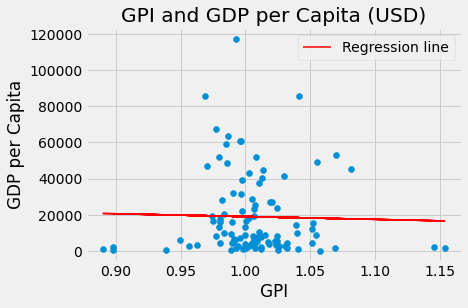

In [48]:
fig, ax = plt.subplots()

ax.scatter(x_gpi, y)
ax.plot(x_gpi, (-15521.07375328*x_gpi + 34593.27278319),
        c = "r", lw = 1.5, label="Regression line")
ax.set_xlabel("GPI")
ax.set_ylabel("GDP per Capita")
ax.set_title("GPI and GDP per Capita (USD)")
ax.legend()

## Regression (linear)

In [54]:
# Standardize values
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

In [55]:
df_sd = pd.DataFrame({"Country": df2020["Country"],
                     "GDP_PC": df2020["GDP_PC"],
                     "GDP_PCL": df2020["GDP_PCL"],
                     "PARLI": standard_units(df2020["PARLI"]),
                     "LABOR": standard_units(df2020["LABOR"]),
                     "FERT": standard_units(df2020["FERT"]),
                     "ENROLL": standard_units(df2020["ENROLL"]),
                     "GPI": standard_units(df2020["GPI"]),})

df_sd = df_sd.reset_index(drop = True)

### Linear

In [56]:
df_sd.head()

,Country,GDP_PC,GDP_PCL,PARLI,LABOR,FERT,ENROLL,GPI
0,Albania,5332.160475,8.581512,0.217132,0.141420,-0.471991,0.013133,0.482080
1,United Arab Emirates,37629.174170,10.535535,1.914998,-1.260048,-0.918237,0.349106,0.122523
2,Argentina,8496.424142,9.047401,1.157367,-0.177757,0.809845,0.680654,0.489261
3,Armenia,4505.867364,8.413136,-0.281937,-0.375106,-0.464642,-0.221385,0.692706
4,Australia,51720.370760,10.853607,0.296291,0.745744,-0.738745,1.426776,-0.706693


In [57]:
y = df_sd[["GDP_PC"]]
x = df_sd[["LABOR","FERT", "ENROLL"]]

In [58]:
regress1 = LinearRegression()
regress1.fit(x, y)
linear2 = regress1.predict(x)

In [59]:
n = df_sd.shape[0]

linear1 = np.array([])

for i in range(n):
    regress1 = LinearRegression()
    regress1.fit(x.drop(i), y.drop(i))
    tmp_pred = regress1.predict(x.iloc[[i]])
    linear1 = np.append(linear1, tmp_pred)

In [60]:
# Absolute Mean Error
linear_abs = np.mean(abs(df_sd.GDP_PC-linear1))
linear_abs

12556.011812003284

In [61]:
# Relative Mean Error
linear_rel = np.mean(abs(df_sd.GDP_PC-linear1)/df_sd.GDP_PC)
linear_rel

3.772038130414886

Text(0.5, 1.0, 'Residual Plot')

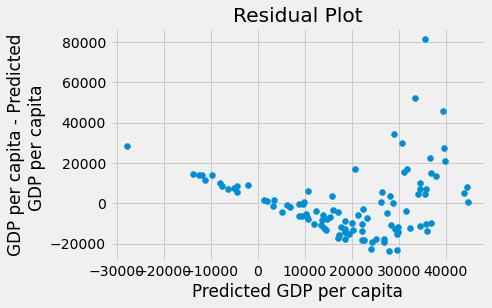

In [62]:
plt.scatter(linear2, y-linear2)
#plt.plot([-10000,65000],[0,0],color="black",lw=1.5)
plt.xlabel("Predicted GDP per capita")
plt.ylabel("GDP per capita - Predicted\nGDP per capita ")
plt.title("Residual Plot")

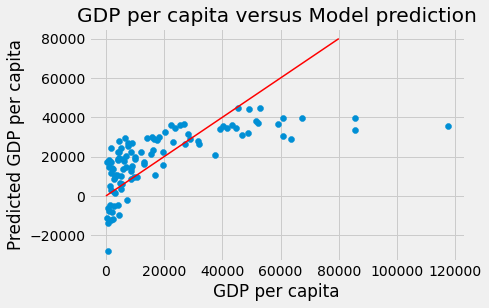

In [81]:
# Plotting actual values v. predicted
plt.scatter(df_sd.GDP_PC, linear2)
plt.title('GDP per capita versus Model prediction')
plt.xlabel("GDP per capita")
plt.ylabel("Predicted GDP per capita")
#plt.plot([-1,10],[-1,10], c = "r", lw = 1.5)
plt.plot([0, 80000], [0, 80000], c= "r", lw= 1.5)

### Polynomial

In [64]:
poly2 = PolynomialFeatures(degree = 2)
x_poly = poly2.fit_transform(x)
x_poly_df = pd.DataFrame(x_poly)

regress1 = LinearRegression()
regress1.fit(x_poly_df, y)
prediction1 = regress1.predict(x_poly_df)

Text(0.5, 1.0, 'Residual Plot')

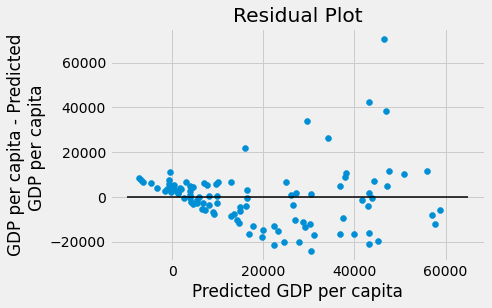

In [65]:
plt.scatter(prediction1, y-prediction1)
plt.plot([-10000,65000],[0,0],color="black",lw=1.5)
plt.xlabel("Predicted GDP per capita")
plt.ylabel("GDP per capita - Predicted\nGDP per capita ")
plt.title("Residual Plot")

In [66]:
n = df_sd.shape[0]
poly2 = PolynomialFeatures(degree = 2)
x_poly2 = poly2.fit_transform(x)
x_poly2df = pd.DataFrame(x_poly2)
x_poly2df

poly2 = np.array([])

for i in range(n):
    regress1 = LinearRegression()
    regress1.fit(x_poly2df.drop(i), y.drop(i))
    tmp_pred = regress1.predict(x_poly2df.iloc[[i]])
    poly2 = np.append(poly2, tmp_pred)

In [67]:
poly2_abs = np.mean(abs(df_sd.GDP_PC-poly2))
poly2_abs

10350.448712422047

In [68]:
poly_rel = np.mean(abs(df_sd.GDP_PC-poly2)/df_sd.GDP_PC)
poly_rel

3.401321811358586

Text(0, 0.5, 'Predicted GDP\nper capita (USD)')

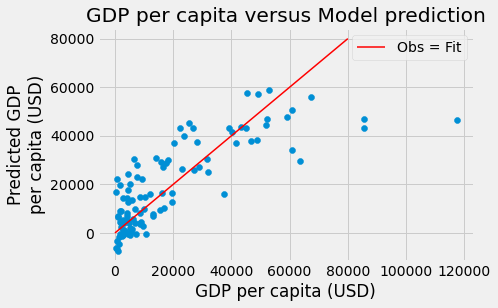

In [91]:
plt.scatter(df_sd.GDP_PC, prediction1)
plt.title('GDP per capita versus Model prediction')
plt.plot([0, 80000], [0, 80000], c= "r", lw= 1.5, label = "Obs = Fit")
plt.legend()
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Predicted GDP\nper capita (USD)")

### Log GDP per capita

In [70]:
y_log = df_sd[["GDP_PCL"]]
x = df_sd[["LABOR","FERT", "ENROLL"]]

In [71]:
regress_linear = LinearRegression()
regress_linear.fit(x, y_log)

LinearRegression()

In [72]:
regress_linear.intercept_, regress_linear.coef_

(array([9.11112452]), array([[ 0.16695355, -0.59578273,  0.59593353]]))

In [73]:
prediction3 = regress_linear.predict(x)

Text(0.5, 1.0, 'Residual Plot')

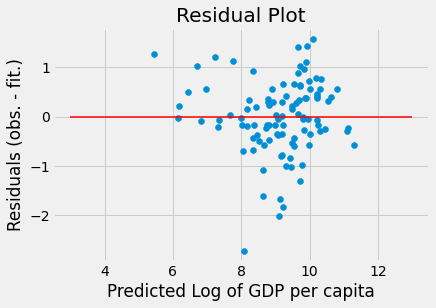

In [74]:
plt.scatter(prediction3, y_log-prediction3)
plt.plot([3, 13],[0,0],color="r",lw=1.5)
plt.xlabel("Predicted Log of GDP per capita")
plt.ylabel("Residuals (obs. - fit.)")
plt.title("Residual Plot")

In [75]:
n = df_sd.shape[0]

log1 = np.array([])

for i in range(n):
    regress1 = LinearRegression()
    regress1.fit(x.drop(i), y_log.drop(i))
    tmp_pred = regress1.predict(x.iloc[[i]])
    log1 = np.append(log1, tmp_pred)
    

In [76]:
linear_abs = np.mean(abs(df_sd.GDP_PCL-log1))
linear_abs

0.5858410834305625

In [77]:
linear_rel = np.mean(abs(df_sd.GDP_PCL-log1)/df_sd.GDP_PCL)
linear_rel

0.06811468736852257

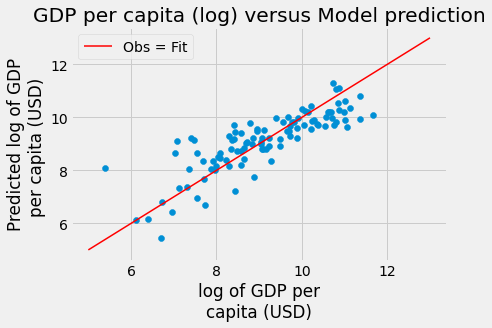

In [90]:
# Plotting actual values v. predicted
plt.scatter(df_sd.GDP_PCL, prediction3)
plt.title('GDP per capita (log) versus Model prediction')
plt.xlabel("log of GDP per\ncapita (USD)")
plt.ylabel("Predicted log of GDP\nper capita (USD) ")
plt.plot([5,13],[5,13], c = "r", lw = 1.5, label = "Obs = Fit")
plt.legend()

## $$log(GDP\ per\ capita) = 9.111 + 0.167*LABOR - 0.596*FERT + 0.596*ENROLL$$